In [2]:
import pandas as pd
from bs4 import BeautifulSoup
from requests import get

In [3]:
# Initializing the series for the loop
theoffice_episodes = []

# For every season in the The Ofice
for sn in range(1,9):
    # Request from the server the content of the web page by and store the server’s response
    response = get('https://www.imdb.com/title/tt0386676/episodes?season=' + str(sn))

    # Parse the content of the request
    page_html = BeautifulSoup(response.text, 'html.parser')

    # Select all the episode containers from the season's page
    episode_containers = page_html.find_all('div', class_ = 'info')

    # For each episode in each season
    for episodes in episode_containers:
            # Get the info of each episode on the page
            season = sn
            episode_number = episodes.meta['content']
            title = episodes.a['title']
            airdate = episodes.find('div', class_='airdate').text.strip()
            rating = episodes.find('span', class_='ipl-rating-star__rating').text
            total_votes = episodes.find('span', class_='ipl-rating-star__total-votes').text
            desc = episodes.find('div', class_='item_description').text.strip()
            # Compile the episode info
            episode_data = [season, episode_number, title, airdate, rating, total_votes, desc]

            # Append the episode info to the complete dataset
            theoffice_episodes.append(episode_data)

In [4]:
#Create the data frame
theoffice_episodes = pd.DataFrame(theoffice_episodes, columns = ['season', 'episode_number', 'title', 'airdate', 'rating', 'total_votes', 'desc'])
theoffice_episodes.head()

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,24 Mar. 2005,7.4,"(7,079)",The premiere episode introduces the boss and s...
1,1,2,Diversity Day,16 Mar. 2005,8.3,"(6,971)",Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,5 Apr. 2005,7.7,"(5,815)",Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,12 Apr. 2005,8.0,"(5,631)","Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,19 Apr. 2005,8.4,"(6,250)",Michael and his staff challenge the warehouse ...


In [5]:
# Convert total votes to numeric integer values
# First reate a function that uses removes the commas and parentheses strings from total_votes
def remove_str(votes):
    for r in ((',',''), ('(',''),(')','')):
        votes = votes.replace(*r)
    return votes

In [6]:
# Apply the function and change from string to integer
theoffice_episodes['total_votes'] = theoffice_episodes.total_votes.apply(remove_str).astype(int)
theoffice_episodes.head()

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,24 Mar. 2005,7.4,7079,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,16 Mar. 2005,8.3,6971,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,5 Apr. 2005,7.7,5815,Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,12 Apr. 2005,8.0,5631,"Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,19 Apr. 2005,8.4,6250,Michael and his staff challenge the warehouse ...


In [7]:
# Change rating from string to numeric
theoffice_episodes['rating'] = theoffice_episodes.rating.astype(float)

In [8]:
# Change airdate from string to datetime
theoffice_episodes['airdate'] = pd.to_datetime(theoffice_episodes.airdate)
theoffice_episodes

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,2005-03-24,7.4,7079,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,2005-03-16,8.3,6971,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,2005-04-05,7.7,5815,Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,2005-04-12,8.0,5631,"Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,2005-04-19,8.4,6250,Michael and his staff challenge the warehouse ...
...,...,...,...,...,...,...,...
160,8,20,Welcome Party,2012-04-12,7.0,2950,Andy tries to break up with his girlfriend aft...
161,8,21,Angry Andy,2012-04-19,6.8,3203,"Andy and Erin return to Dunder Mifflin, only t..."
162,8,22,Fundraiser,2012-04-26,7.0,2839,Andy confronts Robert for the first time after...
163,8,23,Turf War,2012-05-03,7.6,2755,Dwight and Jim fight with the Syracuse over a ...


In [ ]:
theoffice_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   season          165 non-null    int64         
 1   episode_number  165 non-null    object        
 2   title           165 non-null    object        
 3   airdate         165 non-null    datetime64[ns]
 4   rating          165 non-null    float64       
 5   total_votes     165 non-null    int32         
 6   desc            165 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 8.5+ KB


In [37]:
theoffice_episodes.to_csv('TheOffice_Episodes_IMDb_Ratings.csv',index=False)

## Ratings plots

In [20]:
ratings_path = "Data/TheOffice_Episodes_IMDb_Ratings.csv"
df_ratings = pd.read_csv(ratings_path)

In [31]:
df_ratings[0:10]

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,2005-03-24,7.4,7022,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,2005-03-16,8.3,6918,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,2005-04-05,7.7,5771,Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,2005-04-12,8.0,5596,"Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,2005-04-19,8.4,6202,Michael and his staff challenge the warehouse ...
5,1,6,Hot Girl,2005-04-26,7.7,5512,Michael is just one of the many male staff who...
6,2,1,The Dundies,2005-09-20,8.7,6206,"Very much unlike his staff, an overeager Micha..."
7,2,2,Sexual Harassment,2005-09-27,8.2,5323,The office reviews its sexual harassment polic...
8,2,3,Office Olympics,2005-10-04,8.3,5271,"Ready to finalize his deal for a new condo, Mi..."
9,2,4,The Fire,2005-10-11,8.3,5204,A fire in the kitchen relegates the staff to t...


[]

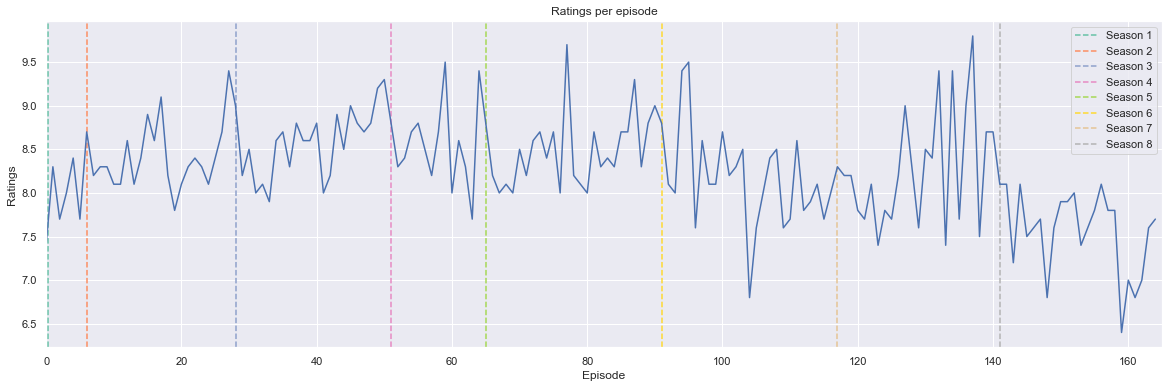

In [82]:
import seaborn as sns; 

sns.set(rc={'figure.figsize':(20,6)})
season_change = [i+1 for i in range(len(df_ratings) -1) if df_ratings.season[i] != df_ratings.season[i+1]]
palette = iter(sns.color_palette("Set2", max(df_ratings.season)))

# season 1
plt.axvline(x=0.3, color = next(palette), linestyle='dashed', label="Season 1")

# seasons 2 - 8
for i, season in enumerate(season_change):
    plt.axvline(x=season, color = next(palette), linestyle='dashed', label= f"Season {i+2}")


ax = sns.lineplot(data = df_ratings.rating)
ax.set(xlabel='Episode', ylabel = "Ratings")
ax.set_title(f"Ratings per episode")
sns.set(rc={'figure.figsize':(10,5)})
plt.xlim(0, len(df_ratings))
ax.plot()